## Loading import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb

import matplotlib.pylab as plt
import matplotlib.pyplot as mp
plt.style.use("seaborn")

import sklearn
from sklearn.linear_model import LinearRegression #for implementing multiple linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf #for detail description of linear coefficients, intercepts, deviations, and many more

## Step 1 merge orders and payments tables

In [2]:
# read csv data
df1 = pd.read_csv('orders.csv')
df1

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368994,93139806,2074,5,93139806,93139806,FINISHED,28.0,0.0,0.00,23,...,5/1/2021 12:44:39 AM,NaN,5/1/2021 1:08:04 AM,0.67,18.33,22.00,4.80,23.13,23.42,68.53
368995,93139809,707,5,93139809,93139809,FINISHED,49.0,11.9,10.04,23,...,5/1/2021 12:36:36 AM,NaN,5/1/2021 12:57:16 AM,1.42,3.48,27.32,6.13,9.62,20.67,57.60
368996,93139813,631,5,93139813,93139813,FINISHED,128.7,11.9,9.29,23,...,5/1/2021 12:47:47 AM,NaN,5/1/2021 1:05:20 AM,11.72,6.38,29.97,11.75,18.13,17.55,65.65
368997,93139814,631,5,93139814,93139814,FINISHED,127.4,11.9,5.00,23,...,5/1/2021 12:31:50 AM,NaN,5/1/2021 12:45:00 AM,NaN,NaN,30.27,NaN,1.88,13.17,45.32


In [3]:

df2 = pd.read_csv('payments.csv')
df2


,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID
...,...,...,...,...,...,...
400829,5535356,92271189,15.80,0.24,PAYMENT_LINK,PAID
400830,5535359,90051751,93.30,1.87,PAYMENT_LINK,PAID
400831,5536362,92645440,43.20,0.65,STORE_DIRECT_PAYMENT,PAID
400832,5538634,92332079,59.90,0.90,PAYMENT_LINK,PAID


In [4]:
inner_join1 = pd.merge(df1, 
                      df2, 
                      on ='payment_order_id', 
                      how ='inner')
inner_join1 

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,payment_id,payment_amount,payment_fee,payment_method,payment_status
0,68410055,2181,35,68410055,68410055,FINISHED,394.80,0.01,6.00,2,...,2391.25,7.17,11.72,21.75,2424.72,4427917,118.44,0.00,VOUCHER,PAID
1,68410055,2181,35,68410055,68410055,FINISHED,394.80,0.01,6.00,2,...,2391.25,7.17,11.72,21.75,2424.72,4427918,394.81,7.90,ONLINE,PAID
2,68412721,631,5,68412721,68412721,FINISHED,195.05,11.90,10.93,14,...,26.07,0.83,11.05,83.30,120.42,4427941,206.95,5.59,ONLINE,PAID
3,68413340,631,5,68413340,68413340,FINISHED,46.90,11.90,11.36,14,...,14.62,9.57,12.67,49.78,77.05,4427948,58.80,1.59,ONLINE,PAID
4,68414018,3265,5,68414018,68414018,FINISHED,45.80,0.00,10.28,14,...,27.48,10.25,13.28,11.05,51.82,4427955,45.80,0.92,ONLINE,PAID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400829,93139806,2074,5,93139806,93139806,FINISHED,28.00,0.00,0.00,23,...,22.00,4.80,23.13,23.42,68.53,5470065,28.00,0.42,ONLINE,PAID
400830,93139809,707,5,93139809,93139809,FINISHED,49.00,11.90,10.04,23,...,27.32,6.13,9.62,20.67,57.60,5470067,60.90,1.64,ONLINE,PAID
400831,93139813,631,5,93139813,93139813,FINISHED,128.70,11.90,9.29,23,...,29.97,11.75,18.13,17.55,65.65,5470072,140.60,3.80,ONLINE,PAID
400832,93139814,631,5,93139814,93139814,FINISHED,127.40,11.90,5.00,23,...,30.27,NaN,1.88,13.17,45.32,5470073,139.30,3.76,ONLINE,PAID


## Step 2 merge deliveries and drivers tables

In [5]:
# read csv data
df3 = pd.read_csv('deliveries.csv')
df4 = pd.read_csv('drivers.csv')

inner_join2 = pd.merge(df3, 
                      df4, 
                      on ='driver_id', 
                      how ='inner')
inner_join2

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type
0,2174658,68413340,8378.0,5199.0,DELIVERED,MOTOBOY,FREELANCE
1,2174663,68412721,8378.0,5714.0,DELIVERED,MOTOBOY,FREELANCE
2,2175006,68424238,8378.0,5389.0,DELIVERED,MOTOBOY,FREELANCE
3,2175302,68423436,8378.0,5052.0,DELIVERED,MOTOBOY,FREELANCE
4,2175636,68457718,8378.0,3249.0,DELIVERED,MOTOBOY,FREELANCE
...,...,...,...,...,...,...,...
362952,3090464,93137619,17848.0,3764.0,DELIVERED,MOTOBOY,FREELANCE
362953,3091409,93138556,63878.0,1830.0,DELIVERED,BIKER,FREELANCE
362954,3092168,93139640,64299.0,5098.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
362955,3092170,93139599,64299.0,2460.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR


## Step 3 merge stores and hubs tables

In [6]:
# read csv data
df5 = pd.read_csv('stores.csv',encoding='latin-1')
df6 = pd.read_csv('hubs.csv', encoding = 'latin-1')

inner_join3 = pd.merge(df5, 
                      df6, 
                      on ='hub_id', 
                      how ='inner')
inner_join3 

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.20352,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.20352,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
3,524,3,ILA RIERUGI,GOOD,49.9,-30.037415,-51.20352,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
4,545,3,IAMUR,FOOD,49.9,-30.037415,-51.20352,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
...,...,...,...,...,...,...,...,...,...,...,...,...
946,4585,85,IRUZZI,GOOD,49.0,-23.513353,-46.61849,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353
947,4587,85,PIPUARIGAI,GOOD,49.0,-23.513353,-46.61849,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353
948,4605,85,USPIMI PRIMI,GOOD,49.0,-23.513353,-46.61849,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353
949,4660,85,CIRUMOI,GOOD,49.9,-23.513353,-46.61849,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353


## Merge the three output tables into one table of kune_cleaned

In [7]:
kune_cleaned = inner_join1.merge(inner_join2,on='delivery_order_id').merge(inner_join3,on='store_id')
kune_cleaned

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,35,68410055,68410055,FINISHED,394.8,0.01,6.00,2,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
1,68410055,2181,35,68410055,68410055,FINISHED,394.8,0.01,6.00,2,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
2,69374502,2181,35,69374502,69374502,FINISHED,19.9,0.01,13.19,16,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
3,69556775,2181,35,69556775,69556775,FINISHED,69.9,0.01,15.10,14,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
4,70480027,2181,35,70480027,70480027,FINISHED,49.8,0.01,17.96,17,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410858,93023550,4559,3,93023550,93023550,FINISHED,229.9,21.90,17.59,21,...,MIAF,GOOD,49.0,-23.513353,-46.618490,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353
410859,93099519,4483,10,93099519,93099519,FINISHED,449.0,15.90,17.32,16,...,SIGO,GOOD,29.0,-23.513353,-46.618490,REACT SHOPPING,SÃO PAULO,SP,-23.513353,-46.618353
410860,93128622,4675,10,93128622,93128622,FINISHED,299.8,9.90,5.00,17,...,SIMUI LIMOI,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
410861,93128777,4675,10,93128777,93128777,FINISHED,129.9,9.90,8.92,17,...,SIMUI LIMOI,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218


In [8]:
# Let’s have a look at data dimensionality, feature names, and feature types.
print(kune_cleaned.shape)

(410863, 51)


### From the output, we can see that the table contains 410863 rows and 51 columns. 
### Now let's try printing out column names using columns:

In [9]:
print(kune_cleaned.columns)

Index(['order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time', 'payment_id', 'payment_amount',
       'payment_fee', 'payment_method', 'payment_status', 'delivery_id',
       'driver_id', 'delivery_distance_meters', 'delivery_status',
       'driver_modal', 'driver_type', 'hub_id', 'store_nam

### Drop columns not required for the analysis

In [10]:
# get rid of just created columns
kune_cleaned.drop(['channel_id','order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time','payment_id','delivery_id',], axis=1, inplace=True)

In [11]:
print(kune_cleaned.shape)

(410863, 31)


In [12]:
kune_cleaned.info() # to show which columns have missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410863 entries, 0 to 410862
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   order_id                   410863 non-null  int64  
 1   store_id                   410863 non-null  int64  
 2   payment_order_id           410863 non-null  int64  
 3   delivery_order_id          410863 non-null  int64  
 4   order_status               410863 non-null  object 
 5   order_amount               410863 non-null  float64
 6   order_delivery_fee         410863 non-null  float64
 7   order_delivery_cost        406989 non-null  float64
 8   order_moment_created       410863 non-null  object 
 9   order_metric_transit_time  407275 non-null  float64
 10  order_metric_cycle_time    410622 non-null  float64
 11  payment_amount             410863 non-null  float64
 12  payment_fee                410863 non-null  float64
 13  payment_method             41

#### The info output shows the following columns have missing values, which we will replace the null values with the mean of the variables
* order_delivery_cost        
* order_metric_transit_time  
* order_metric_cycle_time 
* delivery_distance_meters 
* store_plan_price         
* store_latitude             
* store_longitude        

In [13]:
kune_cleaned["order_delivery_cost"] = kune_cleaned["order_delivery_cost"].fillna(value=kune_cleaned["order_delivery_cost"].mean())
kune_cleaned["order_metric_transit_time"] = kune_cleaned["order_metric_transit_time"].fillna(value=kune_cleaned["order_metric_transit_time"].mean())
kune_cleaned["order_metric_cycle_time"] = kune_cleaned["order_metric_cycle_time"].fillna(value=kune_cleaned["order_metric_cycle_time"].mean())
kune_cleaned["delivery_distance_meters"] = kune_cleaned["delivery_distance_meters"].fillna(value=kune_cleaned["delivery_distance_meters"].mean())
kune_cleaned["store_plan_price"] = kune_cleaned["store_plan_price"].fillna(value=kune_cleaned["store_plan_price"].mean())
kune_cleaned["store_latitude"] = kune_cleaned["store_latitude"].fillna(value=kune_cleaned["store_latitude"].mean())
kune_cleaned["store_longitude"] = kune_cleaned["store_longitude"].fillna(value=kune_cleaned["store_longitude"].mean())


In [14]:
kune_cleaned.info() # to show which columns have missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410863 entries, 0 to 410862
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   order_id                   410863 non-null  int64  
 1   store_id                   410863 non-null  int64  
 2   payment_order_id           410863 non-null  int64  
 3   delivery_order_id          410863 non-null  int64  
 4   order_status               410863 non-null  object 
 5   order_amount               410863 non-null  float64
 6   order_delivery_fee         410863 non-null  float64
 7   order_delivery_cost        410863 non-null  float64
 8   order_moment_created       410863 non-null  object 
 9   order_metric_transit_time  410863 non-null  float64
 10  order_metric_cycle_time    410863 non-null  float64
 11  payment_amount             410863 non-null  float64
 12  payment_fee                410863 non-null  float64
 13  payment_method             41

### The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types)

In [15]:
kune_cleaned.describe()

,order_id,store_id,payment_order_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_metric_transit_time,order_metric_cycle_time,payment_amount,payment_fee,driver_id,delivery_distance_meters,hub_id,store_plan_price,store_latitude,store_longitude,hub_latitude,hub_longitude
count,4.108630e+05,410863.000000,4.108630e+05,4.108630e+05,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000,4.108630e+05,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000,410863.000000
mean,8.230508e+07,1253.555465,8.230508e+07,8.230508e+07,95.822864,5.993580,7.672782,54.853877,121.784412,93.293481,1.884806,21011.926703,2.742251e+03,25.960958,30.875996,-24.137360,-46.077542,-24.137191,-46.078657
std,6.978930e+06,1181.368249,6.978930e+06,6.978930e+06,217.366855,6.130564,3.388624,966.742851,1047.312023,217.999400,4.465903,15468.144638,1.729098e+04,15.607501,19.911082,2.065333,2.537475,2.067403,2.540073
min,6.841006e+07,6.000000,6.841006e+07,6.841006e+07,0.000000,0.000000,0.000000,-4.100000,0.530000,0.000000,0.000000,133.000000,0.000000e+00,3.000000,0.000000,-30.085743,-51.245997,-30.085743,-51.245997
25%,7.650953e+07,415.000000,7.650953e+07,7.650953e+07,39.000000,0.000000,5.670000,11.820000,32.930000,32.900000,0.450000,7638.000000,1.155000e+03,16.000000,0.010000,-23.622995,-46.721291,-23.622995,-46.718197
50%,8.320707e+07,747.000000,8.320707e+07,8.320707e+07,68.000000,6.900000,7.530000,16.770000,42.280000,66.500000,1.050000,18789.000000,2.020000e+03,26.000000,30.875996,-23.561053,-46.618490,-23.561053,-46.618353
75%,8.792710e+07,1930.000000,8.792710e+07,8.792710e+07,117.000000,11.900000,8.880000,24.980000,55.570000,121.700000,2.730000,31048.000000,3.368000e+03,33.000000,49.900000,-22.973150,-43.370811,-22.969880,-43.370811
max,9.313982e+07,4679.000000,9.313982e+07,9.313982e+07,100000.110000,990.110000,156.000000,154261.100000,154277.320000,100000.110000,2000.000000,66459.000000,7.251291e+06,86.000000,49.900000,-22.884332,-43.176536,-22.885820,-43.182181


### Exporting the dataframe as excel for usage in tableau!

In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [17]:
kune_cleaned.to_excel(r'C:\Users\user\Desktop\kune_cleaned.xlsx', index = False, header=True)

### Plotting correlation heatmap

#### Plotting the correlation heatmap to show if the variables in the dataset show positive, negative or no correlation

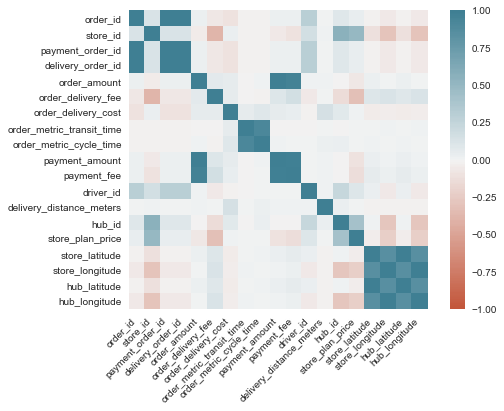

In [18]:
corr = kune_cleaned.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Multiple Linear regression

#### I want to predict order amount based on order_delivery_fee, order_delivery_cost, order_metric_transit_time,order_metric_cycle_time and payment_amount

In [19]:
kune_cleaned.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_moment_created,order_metric_transit_time,...,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,68410055,68410055,FINISHED,394.8,0.01,6.00,1/1/2021 2:32:51 AM,21.75,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218
1,68410055,2181,68410055,68410055,FINISHED,394.8,0.01,6.00,1/1/2021 2:32:51 AM,21.75,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218
2,69374502,2181,69374502,69374502,FINISHED,19.9,0.01,13.19,1/5/2021 4:26:12 PM,34.37,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218
3,69556775,2181,69556775,69556775,FINISHED,69.9,0.01,15.10,1/6/2021 2:40:14 PM,36.08,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218
4,70480027,2181,70480027,70480027,FINISHED,49.8,0.01,17.96,1/10/2021 5:51:41 PM,38.05,...,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218


### Now, we can segregate the kune_cleaned dataset into two components X and Y where X is independent variables.. and Y is the dependent variable.

In [20]:
X=kune_cleaned[['order_delivery_fee', 'order_delivery_cost', 'order_metric_transit_time','order_metric_cycle_time','payment_amount']]
Y=kune_cleaned['order_amount']

### Performing the linear regression

In [21]:
reg=LinearRegression()     #initiating linearregression
reg.fit(X,Y)


LinearRegression()

In [22]:
Intercept=reg.intercept_
Coefficients=reg.coef_

In [23]:
print(Intercept)


9.80090642384377


In [24]:
print(Coefficients)

[-1.13819096e+00  5.03834118e-02  1.99496977e-04 -1.41071487e-04
  9.91103032e-01]


 ### regression equation becomes

### Y = 9.80090642384377 - (1.13819096e+00 * X1) - (5.03834118e-02 * X2) - (1.99496977e-04 * X3) - (-1.41071487e-04 * X4) +(9.91103032e-01 * X5)

### where x1,x2,x3,x4,x5,x6 are the values that we can use for prediction with respect to columns. For eg: x1 is for order_delivery_fee, x2 is for order_delivery_cost, x4 is order_metric_cycle_time…

### The regression results can also be printed as shown below

In [26]:
X=sm.add_constant(X)        #to add constant value in the model
model= sm.OLS(Y,X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           order_amount   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.613e+06
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:46:02   Log-Likelihood:            -1.9630e+06
No. Observations:              410863   AIC:                         3.926e+06
Df Residuals:                  410857   BIC:                         3.926e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.8009      0.118     82.896      0.000       9.569      10.033
order_delivery_fee           -1.1382      0.007   -154.510      0.000      -1.153      -1.124
order_delivery_cost           0.0504      0.013      3.773      0.000       0.024       0.077
order_metric_transit_time     0.0002      0.000      1.599      0.110    -4.5e-05       0.000
order_metric_cycle_time      -0.0001      0.000     -1.222      0.222      -0.000    8.52e-05
payment_amount                0.9911      0.000   4782.488      0.000       0.991       0.992
==============================================================================
Omnibus:                  1284679.602   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1519522334259.092
Skew:                          48.108   Prob(JB):                         0.00
Kurtosis:                    9423.805   Cond. No.                     3.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""